次のデータセット$(x,y)$から得られる回帰直線を最小二乗法で求め、データセットと共に、回帰直線を図示しなさい。また決定係数を求めなさい。これらをJupyterの環境で実行して、PDFに変換して提出しなさい。

| | | |
|-|-|-|
|x|2.8|2.9|3.0|3.1|3.2|3.2|3.2|3.3|3.4|
|y|30 |26 |33|31|33|35|37|36|33|


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = np.array([[2.8, 30],
                 [2.9,26],
                 [3.0,33],
                 [3.1,31],
                 [3.2,33],
                 [3.2,35],
                 [3.2,37],
                 [3.3,36],
                 [3.4,33]
                ])
df = pd.DataFrame(data)
df.columns = ['x', 'y']
df.describe()

,x,y
count,9.000000,9.000000
mean,3.122222,32.666667
std,0.192209,3.354102
min,2.800000,26.000000
25%,3.000000,31.000000
50%,3.200000,33.000000
75%,3.200000,35.000000
max,3.400000,37.000000


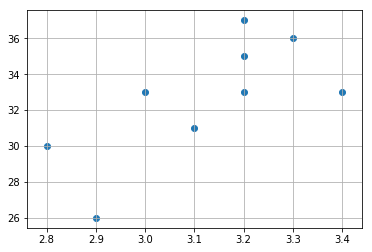

In [3]:
plt.scatter(data[:,0], data[:,1])
plt.grid()

In [4]:
#正規方程式の要素を求める
#変数の初期化
left_11 = 0
left_12 = 0
left_21 = 0
left_22 = 0
right_11 = 0
right_21 = 0

#左辺11要素
for i in data[:,0]:
    left_11 += i ** 2
#左辺12要素
for i in data[:,0]:
    left_12 += i
#左辺21要素
for i in data[:,0]:
    left_21 += i
#左辺22要素
for i in data[:,0]:
    left_22 += 1
print(left_11)
print(left_12)
print(left_21)
print(left_22)

#右辺11要素
for i, j in zip(data[:, 0], data[:,1]):
    right_11 += i * j
#右辺21要素
for i in data[:,1]:
    right_21 += i
print(right_11)
print(right_21)

88.03000000000002
28.099999999999998
28.099999999999998
9
921.5
294.0


In [5]:
from numpy.linalg import solve
left = [
    [left_11, left_12],
    [left_21, left_22]
]
right = [right_11, right_21]
value = solve(left, right)
print(value)

[12.06766917 -5.0112782 ]


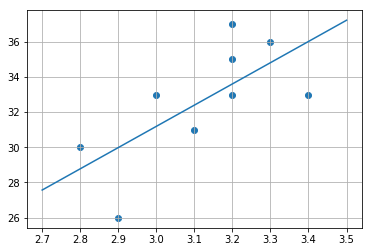

In [6]:
#回帰直線を描画
plt.scatter(data[:,0],data[:,1])
plt.grid()
x = np.arange(2.7, 3.6, 0.1)
y = value[0] * x + value[1]
plt.plot(x, y)

In [7]:
r2 = 0 #決定係数
rss = 0 #残差平方和
sum = 0 #偏差平方和
#RSS(残差平方和)を求める
for i, j in zip(data[:, 0], data[:,1]):
    rss += (j - value[0] * i - value[1])**2
print(rss)

#偏差平方和を求める
for i in data[:,1]:
    sum += (i - np.mean(data[:,1]))**2
print(sum)

#決定係数を求める
r2 = 1 - rss / sum
print(r2)

46.9586466165413
90.00000000000001
0.4782372598162078
